In [1]:
!kaggle datasets download -d borhanitrash/animal-image-classification-dataset

Dataset URL: https://www.kaggle.com/datasets/borhanitrash/animal-image-classification-dataset
License(s): MIT
 70% 27.0M/38.4M [00:00<00:00, 140MB/s]
100% 38.4M/38.4M [00:00<00:00, 168MB/s]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers, Model
from keras.preprocessing.image import ImageDataGenerator

In [3]:
# unzipping the data:

!unzip -qq /content/animal-image-classification-dataset.zip

In [4]:
# reading the data:

path = '/content/Animals'

In [5]:
import pathlib
data_dir = pathlib.Path(path)

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))

In [7]:
image_count

3000

In [8]:
import PIL
import PIL.Image

In [9]:
cats = list(data_dir.glob('cats/*'))

# Cute Kitty:

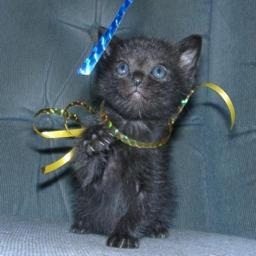

In [10]:
PIL.Image.open(str(cats[0]))

# Majestic Kitty:

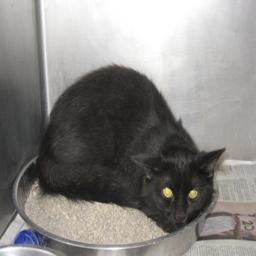

In [11]:
PIL.Image.open(str(cats[1]))

# Simply Beautiful Kitty:

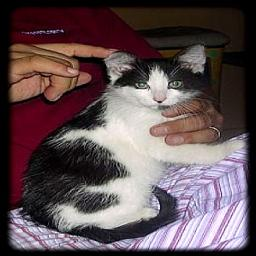

In [12]:
PIL.Image.open(str(cats[420]))

In [13]:
image_height = 256
image_width = 256
c_channels = 3
batch_size = 128

In [14]:
# loading images using keras:

x_train = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.1,
    subset = 'training',
    seed = 123,
    image_size = (image_height, image_width),
    batch_size = batch_size
)

Found 3000 files belonging to 3 classes.
Using 2700 files for training.


In [15]:
x_val = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.1,
    subset = 'validation',
    seed = 123,
    image_size = (image_height, image_width),
    batch_size = batch_size
)

Found 3000 files belonging to 3 classes.
Using 300 files for validation.


In [16]:
class_names = x_train.class_names

In [17]:
class_names

['cats', 'dogs', 'snakes']

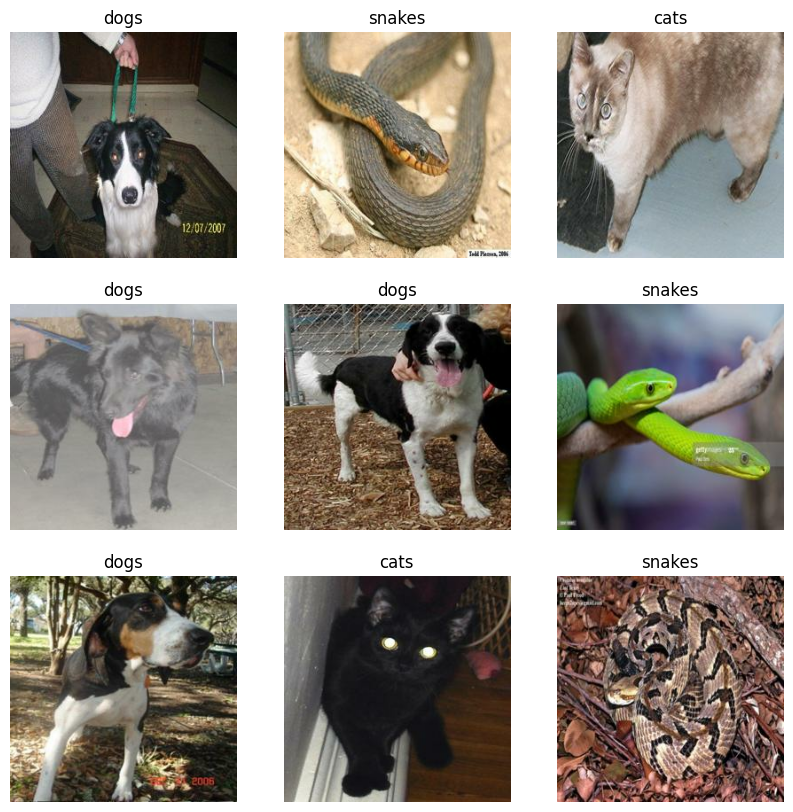

In [18]:
# visualizing the data as data:

plt.figure(figsize = (10, 10))
for images, labels in x_train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')

In [19]:
for image_batch, labels_batch in x_train:
  print(image_batch.shape)
  print(labels_batch.shape)
  print(image_batch[0])
  break

(128, 256, 256, 3)
(128,)
tf.Tensor(
[[[103. 139. 165.]
  [101. 137. 163.]
  [ 99. 135. 161.]
  ...
  [ 89. 114. 119.]
  [ 96. 120. 124.]
  [108. 132. 136.]]

 [[107. 143. 169.]
  [103. 139. 165.]
  [100. 136. 162.]
  ...
  [ 91. 116. 121.]
  [ 94. 117. 123.]
  [100. 124. 128.]]

 [[106. 142. 168.]
  [103. 139. 165.]
  [101. 137. 163.]
  ...
  [ 87. 115. 119.]
  [ 84. 109. 114.]
  [ 83. 108. 113.]]

 ...

 [[ 41.  77.  39.]
  [ 43.  79.  41.]
  [ 37.  73.  35.]
  ...
  [ 32.  64.  40.]
  [ 27.  59.  35.]
  [ 21.  53.  29.]]

 [[ 24.  60.  22.]
  [ 39.  75.  37.]
  [ 46.  82.  44.]
  ...
  [ 30.  62.  38.]
  [ 26.  58.  35.]
  [ 21.  53.  30.]]

 [[ 19.  55.  17.]
  [ 40.  76.  38.]
  [ 52.  88.  50.]
  ...
  [ 29.  61.  37.]
  [ 25.  57.  34.]
  [ 22.  54.  31.]]], shape=(256, 256, 3), dtype=float32)


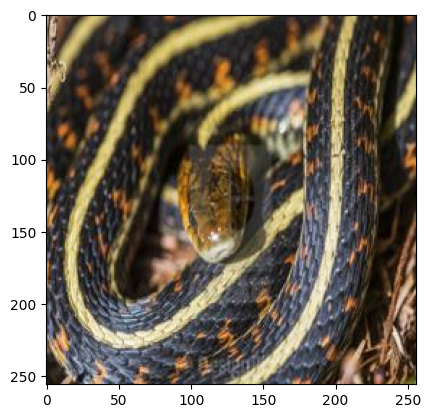

In [20]:
plt.imshow(image_batch[29].numpy().astype('uint8'))
plt.show()

In [21]:
# Normalization layer:

normalization_layer = layers.Rescaling(1./255)

In [22]:
# Applying normalization to the data:

normalized_ds = x_train.map(lambda x, y: (normalization_layer(x),y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

In [23]:
first_image

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[0.47058827, 0.43921572, 0.427451  ],
        [0.48627454, 0.454902  , 0.4431373 ],
        [0.49803925, 0.4666667 , 0.454902  ],
        ...,
        [0.67058825, 0.627451  , 0.6039216 ],
        [0.67058825, 0.627451  , 0.6039216 ],
        [0.53333336, 0.4901961 , 0.4666667 ]],

       [[0.4784314 , 0.44705886, 0.43529415],
        [0.4901961 , 0.45882356, 0.44705886],
        [0.49803925, 0.4666667 , 0.454902  ],
        ...,
        [0.67058825, 0.627451  , 0.6039216 ],
        [0.654902  , 0.6117647 , 0.5882353 ],
        [0.52156866, 0.4784314 , 0.454902  ]],

       [[0.49411768, 0.46274513, 0.45098042],
        [0.49803925, 0.4666667 , 0.454902  ],
        [0.5058824 , 0.47450984, 0.46274513],
        ...,
        [0.6627451 , 0.627451  , 0.5921569 ],
        [0.64705884, 0.6117647 , 0.5764706 ],
        [0.5372549 , 0.5019608 , 0.4666667 ]],

       ...,

       [[0.227451  , 0.15294118, 0.16862746],
        [0.36

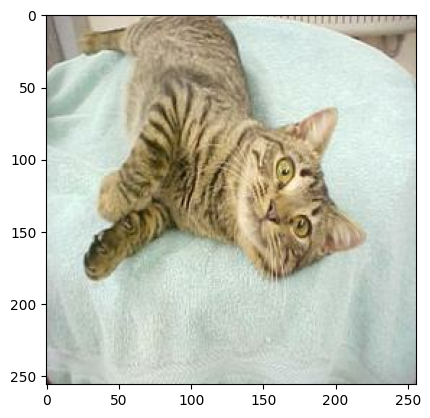

In [24]:
plt.imshow(first_image)
plt.show()

In [25]:
print(f' Min: {np.min(first_image)}, Max: {np.max(first_image)}')

 Min: 0.0, Max: 1.0


Let's make sure to use buffered prefetching so you can yield data from disk without having I/O become blocking. These are two important methods you should use when loading data:

* `Dataset.cache` keeps the images in memory after they're loaded off disk during the first epoch. This will ensure the dataset does not become a bottleneck while training your model. If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache.

* `Dataset.prefetch` overlaps data preprocessing and model execution while training.

In [26]:
# Configuring the dataset for performance:

AUTOTUNE = tf.data.AUTOTUNE

train_ds = x_train.cache().prefetch(buffer_size = AUTOTUNE)
val_ds = x_val.cache().prefetch(buffer_size = AUTOTUNE)

# Defining the model using Subclassing API

In [27]:

class CNN(Model):

  def __init__(self, num_classes, n_filters = 64, filter_dim = (3,3), pool_dim = (2,2), n_conv = 2, n_neurons = 64, n_dense = 4,
               dropout = 0.2, activation = 'relu', image_height = 256, image_width = 256, c_channels = 3):
    super(CNN, self).__init__()

    self.num_classes = num_classes
    self.n_filters = n_filters
    self.filter_dim = filter_dim
    self.pool_dim = pool_dim
    self.n_conv = n_conv
    self.n_neurons = n_neurons
    self.n_dense = n_dense
    self.dropout = dropout
    self.activation = activation
    self.image_height = image_height
    self.image_width = image_width
    self.c_channels = c_channels

    self.stacks = []

    # self.stacks.append(layers.InputLayer(input_shape = (image_height, image_width, c_channels)))

    self.stacks.append(layers.Conv2D(filters = n_filters, kernel_size = filter_dim,
                                     activation = activation, input_shape = (image_height, image_width, c_channels)))
    self.stacks.append(layers.MaxPooling2D(pool_dim))
    self.stacks.append(layers.BatchNormalization())
    self.stacks.append(layers.Dropout(dropout))

    for i in range(n_conv):
      self.stacks.append(layers.Conv2D(filters = n_filters, kernel_size = filter_dim, activation = activation))
      self.stacks.append(layers.MaxPooling2D(pool_dim))
      self.stacks.append(layers.BatchNormalization())
      self.stacks.append(layers.Dropout(dropout))

    self.stacks.append(layers.Flatten())

    for i in range(n_dense):
      self.stacks.append(layers.Dense(n_neurons, activation = activation))
      self.stacks.append(layers.BatchNormalization())
      self.stacks.append(layers.Dropout(dropout))

    self.stacks.append(layers.Dense(num_classes, activation = 'softmax'))

  def call(self, inputs):
    x = inputs
    for layer in self.stacks:
      x = layer(x)
    return x


In [28]:
model = CNN(num_classes = len(class_names))

In [29]:
model.build(input_shape = (batch_size, image_height, image_width, c_channels))

In [30]:
model.summary()

Model: "cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             multiple                  1792      
                                                                 
 max_pooling2d (MaxPooling2  multiple                  0         
 D)                                                              
                                                                 
 batch_normalization (Batch  multiple                  256       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           multiple                  0         
                                                                 
 conv2d_1 (Conv2D)           multiple                  36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  multiple                  0       

In [31]:
from keras.utils import plot_model

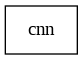

In [32]:
plot_model(model, show_shapes = True, show_layer_names = True)

In [33]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [34]:
n_epochs = 25

In [35]:
model.fit(train_ds, validation_data = val_ds, epochs = n_epochs)

Epoch 1/25
22/22 [==============================] - 42s 939ms/step - loss: 1.1596 - accuracy: 0.4848 - val_loss: 9.8862 - val_accuracy: 0.3400
Epoch 2/25
22/22 [==============================] - 17s 759ms/step - loss: 0.8959 - accuracy: 0.5833 - val_loss: 7.0860 - val_accuracy: 0.3400
Epoch 3/25
22/22 [==============================] - 17s 763ms/step - loss: 0.8149 - accuracy: 0.6141 - val_loss: 3.1568 - val_accuracy: 0.3667
Epoch 4/25
22/22 [==============================] - 17s 771ms/step - loss: 0.7614 - accuracy: 0.6341 - val_loss: 1.9048 - val_accuracy: 0.4500
Epoch 5/25
22/22 [==============================] - 17s 767ms/step - loss: 0.6893 - accuracy: 0.6630 - val_loss: 1.4703 - val_accuracy: 0.5000
Epoch 6/25
22/22 [==============================] - 17s 772ms/step - loss: 0.6566 - accuracy: 0.6833 - val_loss: 0.7706 - val_accuracy: 0.6300
Epoch 7/25
22/22 [==============================] - 17s 772ms/step - loss: 0.6144 - accuracy: 0.7052 - val_loss: 0.6563 - val_accuracy: 0.6767

In [36]:
# saving the model:

model.save('model.tf')

In [37]:
# loading the model:
model = keras.models.load_model('model.tf')

In [38]:
# testing the model on outside data:

import os
import cv2 as cv

In [46]:
image_dir = '/content/Marquis'

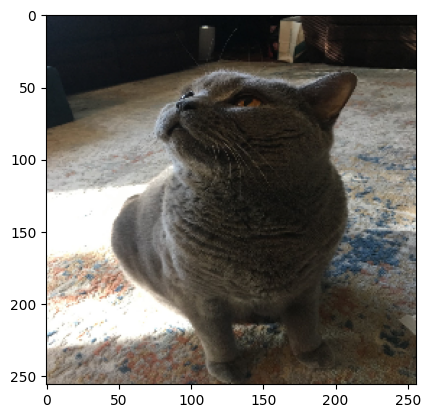

1/1 [==============================] - 0s 28ms/step
Prediction: cats


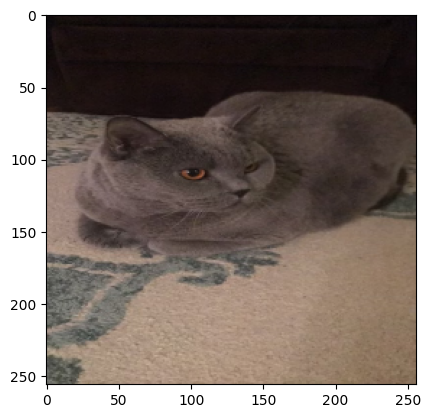

1/1 [==============================] - 0s 22ms/step
Prediction: cats


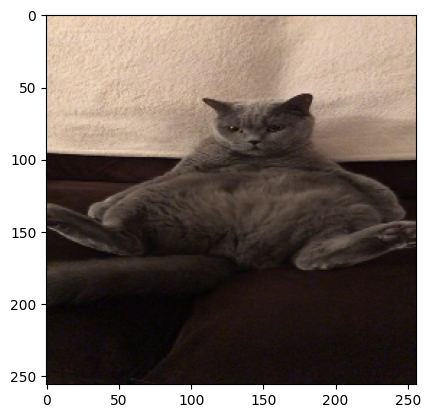

1/1 [==============================] - 0s 22ms/step
Prediction: cats


In [51]:
# Function to process and predict an image
def process_and_predict_image(image_path, model):
    # Load the image
    image = cv.imread(image_path)
    if image is None:
        print(f"Failed to load image: {image_path}")
        return

    # Resize the image
    image = cv.resize(image, (image_height, image_width))

    # Display the image
    # plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    # plt.show()

    # Convert color from BGR to RGB
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

    # Display the corrected image
    plt.imshow(image)
    plt.show()

    # Prepare the image
    image = image.astype('float32') / 255.0

    # Predict using the model
    prediction = model.predict(np.array([image]))
    print(f"Prediction: {x_train.class_names[np.argmax(prediction)]}")

# Loop through all images in the directory
for filename in os.listdir(image_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(image_dir, filename)
        process_and_predict_image(image_path, model)

1/1 [==============================] - 0s 43ms/step


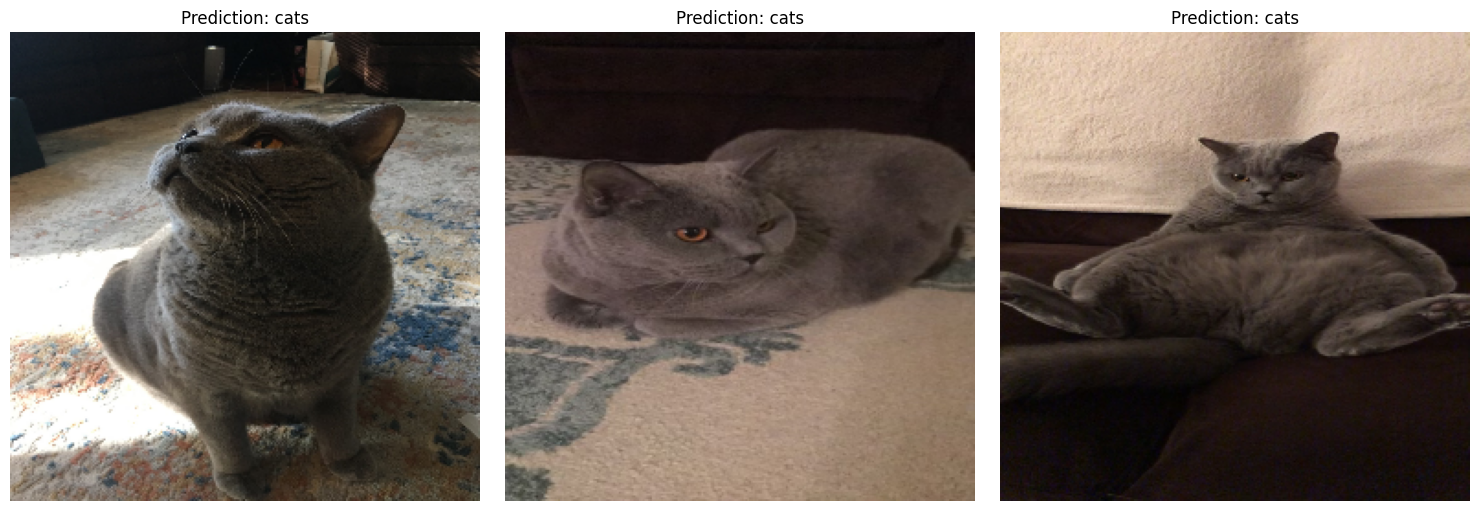

In [52]:
# Function to process and predict an image
def process_and_predict_image(image_path, model, ax):
    # Load the image
    image = cv.imread(image_path)
    if image is None:
        print(f"Failed to load image: {image_path}")
        return

    # Resize the image
    image = cv.resize(image, (image_height, image_width))

    # Convert color from BGR to RGB
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

    # Display the corrected image
    ax.imshow(image)
    ax.axis('off')

    # Prepare the image
    image = image.astype('float32') / 255.0

    # Predict using the model
    prediction = model.predict(np.array([image]))
    ax.set_title(f"Prediction: {x_train.class_names[np.argmax(prediction)]}")

# Get a list of all image files in the directory
image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg') or f.endswith('.png')]

# Set up the grid layout
num_images = len(image_files)
cols = 3  # Number of columns in the grid
rows = (num_images + cols - 1) // cols  # Number of rows in the grid

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()

# Loop through all images and process them
for i, filename in enumerate(image_files):
    image_path = os.path.join(image_dir, filename)
    process_and_predict_image(image_path, model, axes[i])

# Hide any remaining empty subplots
for ax in axes[num_images:]:
    ax.axis('off')

plt.tight_layout()
plt.show()